In [1]:


import cv2
import matplotlib.pyplot as plt
import dlib
from imutils import face_utils
font = cv2.FONT_HERSHEY_SIMPLEX


In [2]:
# cascPath = "/content/classifiers/haarcascade_frontalface_default.xml"
# eyePath = "/content/classifiers/haarcascade_eye.xml"
# smilePath = "/content/classifiers/haarcascade_smile.xml"
# faceCascade = cv2.CascadeClassifier(cascPath)
# eyeCascade = cv2.CascadeClassifier(eyePath)
#smileCascade = cv2.CascadeClassifier(smilePath)
smileCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')



# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
# smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

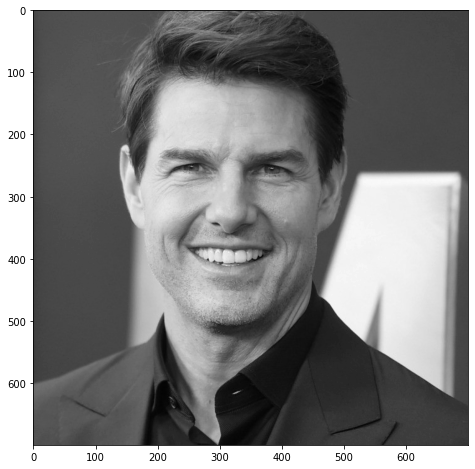

In [ ]:
# Load the image
# gray = cv2.imread('/content/test_images/.jpg', 0)
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()

In [3]:
# Detect faces
import os
violajones_annotations={}
for filename in os.listdir("/content/"):
  if filename.endswith(".jpg"):
    if (filename.split("_")[0][0] == '0'):
      id = int(filename.split("_")[0][1])
    else:
      id = int(filename.split("_")[0])

    bb={}
    gray = cv2.imread('/content/'+filename, 0)
    faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    flags=cv2.CASCADE_SCALE_IMAGE
    )

    print((faces.shape),filename)
    count = 0
    for (x, y, w, h) in faces: 
        # Draw rectangle around the face
        cv2.rectangle(gray, (x, y), (x+w, y+h), (255, 255, 255), 3)
        bb[count]={"x":float(x),"y":float(y),"w":float(w),"h":float(h)}
        count = count +1
    violajones_annotations[id]=bb
    

    # plt.figure(figsize=(12,8))
    # plt.imshow(gray, cmap='gray')
    # plt.show()
    

(1, 4) 40_f_r.jpg
(2, 4) 08_m_m.jpg
(1, 4) 39_f_r.jpg
(1, 4) 30_f_m.jpg
(1, 4) 44_f_r.jpg
(2, 4) 31_f_m.jpg
(1, 4) 45_f_r.jpg
(1, 4) 06_m_m.jpg
(1, 4) 46_f_r.jpg
(1, 4) 42_f_r.jpg
(1, 4) 05_m_m.jpg
(3, 4) 22_m_r.jpg
(1, 4) 21_m_r.jpg
(1, 4) 19_m_r.jpg
(1, 4) 33_f_m.jpg
(1, 4) 02_m_m.jpg
(2, 4) 35_f_m.jpg
(1, 4) 18_m_r.jpg
(1, 4) 15_m_r.jpg
(2, 4) 09_m_m.jpg
(1, 4) 12_m_r.jpg
(1, 4) 00_m_m.jpg
(1, 4) 25_f_m.jpg
(1, 4) 14_m_r.jpg
(1, 4) 27_f_m.jpg
(1, 4) 43_f_r.jpg
(1, 4) 23_m_r.jpg
(1, 4) 32_f_m.jpg
(1, 4) 13_m_r.jpg
(1, 4) 10_m_m.jpg
(1, 4) 28_f_m.jpg
(1, 4) 34_f_m.jpg
(1, 4) 47_f_r.jpg
(3, 4) 04_m_m.jpg
(1, 4) 37_f_r.jpg
(1, 4) 01_m_m.jpg
(1, 4) 41_f_r.jpg
(2, 4) 17_m_r.jpg
(1, 4) 36_f_r.jpg
(1, 4) 07_m_m.jpg
(1, 4) 29_f_m.jpg
(1, 4) 26_f_m.jpg
(1, 4) 03_m_m.jpg
(1, 4) 38_f_r.jpg
(1, 4) 20_m_r.jpg
(1, 4) 16_m_r.jpg
(1, 4) 24_f_m.jpg
(1, 4) 11_m_m.jpg


In [4]:
print(violajones_annotations)

{40: {0: {'x': 41.0, 'y': 248.0, 'w': 479.0, 'h': 479.0}}, 8: {0: {'x': 248.0, 'y': 114.0, 'w': 66.0, 'h': 66.0}, 1: {'x': 67.0, 'y': 92.0, 'w': 364.0, 'h': 364.0}}, 39: {0: {'x': 167.0, 'y': 254.0, 'w': 686.0, 'h': 686.0}}, 30: {0: {'x': 146.0, 'y': 321.0, 'w': 854.0, 'h': 854.0}}, 44: {0: {'x': 107.0, 'y': 222.0, 'w': 628.0, 'h': 628.0}}, 31: {0: {'x': 127.0, 'y': 225.0, 'w': 534.0, 'h': 534.0}, 1: {'x': 404.0, 'y': 920.0, 'w': 100.0, 'h': 100.0}}, 45: {0: {'x': 167.0, 'y': 101.0, 'w': 314.0, 'h': 314.0}}, 6: {0: {'x': 121.0, 'y': 504.0, 'w': 1504.0, 'h': 1504.0}}, 46: {0: {'x': 92.0, 'y': 235.0, 'w': 388.0, 'h': 388.0}}, 42: {0: {'x': 326.0, 'y': 380.0, 'w': 858.0, 'h': 858.0}}, 5: {0: {'x': 342.0, 'y': 343.0, 'w': 1172.0, 'h': 1172.0}}, 22: {0: {'x': 307.0, 'y': 539.0, 'w': 1622.0, 'h': 1622.0}, 1: {'x': 346.0, 'y': 2412.0, 'w': 120.0, 'h': 120.0}, 2: {'x': 361.0, 'y': 2364.0, 'w': 126.0, 'h': 126.0}}, 21: {0: {'x': 700.0, 'y': 348.0, 'w': 656.0, 'h': 656.0}}, 19: {0: {'x': 151.0, 

In [5]:
import json



json = json.dumps(violajones_annotations)
f = open("violajones_annotations.json","w")
f.write(json)
f.close()

In [ ]:
#     bl = [x,y]
    #     br = [x+w,y]
    #     tl = [x,y+h]
    #     tr = [x+w,y+h]

    #     local_dict = {"bottom-left":bl,"bottom-right":br,"top-left":tl,"top-right":tr}
    #     #print(local_dict)
    #     faces_dict[face_id] = local_dict
    #     face_id += 1

    
    
    #print(faces_dict)

In [ ]:
smile = smileCascade.detectMultiScale(
        gray,
        scaleFactor= 1.16,
        minNeighbors=35,
        minSize=(25, 25),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
for (sx, sy, sw, sh) in smile:
  cv2.rectangle(gray, (sh, sy), (sx+sw, sy+sh), (255, 0, 0), 2)

In [ ]:
eyes = eyeCascade.detectMultiScale(gray)
for (ex,ey,ew,eh) in eyes:
  cv2.rectangle(gray,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
  cv2.putText(frame,'Eye',(x + ex,y + ey), 1, 1, (0, 255, 0), 1)

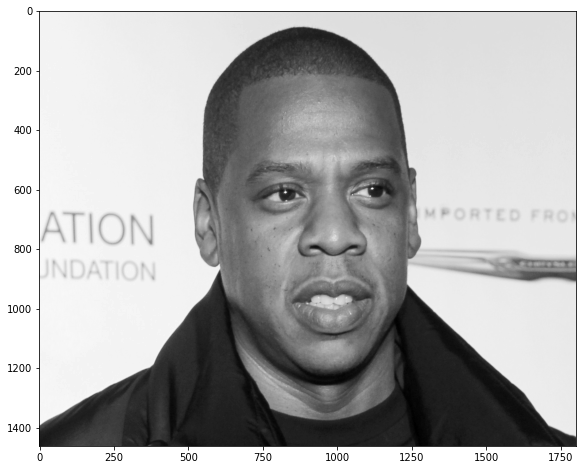

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()